### Part 0: Regular expressions

Before we get started, we have to get a little head start on the Natural Language Processing part of the class. This is a new direction for us, up to now, we've mostly been doing math-y stuff with Python, but today, we're going to be using Python to work through a text. The central thing we need to be able to do today, is to extract internal wikipedia links. And for that we need regular expressions.

Exercises: Regular expressions round 1.

* Read this tutorial to form an overview of regular expressions. This is important to understand the content of the tutorial (also very useful later), so you may actually want to work through the examples.
* Now, explain in your own words: what are regular expressions?

Regular expressions is a way to filter a string with a pattern. The patterns can include logic and they define the structure that the string should be compared against. 



In [1]:
import re
import io
import os

def apply_pattern_to_file(file_path,pattern):
    f = io.open(file_path,"r",encoding="utf-8")
    match = re.findall(pattern,f.read())
    f.close()
    return match


* Provide an example of a regex to match 4 digits numbers (by this, I mean precisely 4 digits, you should not match any part of numbers with e.g. 5 digits). In your notebook, use findall to show that your regex works on this test-text. Hint: a great place to test out regular expressions is: https://regex101.com.

In [2]:
apply_pattern_to_file("test.txt",r'\d\d\d\d')

[u'1234', u'9999', u'2345']


* Provide an example of a regex to match words starting with "super". Show that it works on the test-text.

In [3]:
apply_pattern_to_file("test.txt",r'super\w*')

[u'superpolaroid', u'supertaxidermy', u'superbeer']

* Exercise: Regular expressions round 2. Show that you can extract the wiki-links from the test-text. Perhaps you can find inspiration on stack overflow or similar. Hint: Try to solve this exercise on your own (that's what you will get the most out of - learning wise), but if you get stuck ... take a look at the video lecture below.

In [4]:
regex = r'(\[\[)([\w\-\(\)\.\\ ]+)|([\w\-\(\)\.\\ ]*)(\]\])'
matchs = apply_pattern_to_file("test.txt",regex)
for match in matchs:
    
    if match[1] is not u"":
        print match[1]
#         
    if match[2] is not u"":
        print match[2]



drinking vinegar
gentrify
hashtag
Bicycle
Bicycle(two-wheeled type)
Pitchfork
Pitchfork Magazine


In [5]:
def create_query(name,language):
    print(name,language)
    baseurl = "https://%s.wikipedia.org/w/api.php?" % language.encode("utf-8")
    action = "action=query"
    title = "titles=%s" % name.encode('utf-8').replace(" ","%20")
    content = "prop=revisions&rvprop=content"
    dataformat = "format=json"

    query = "%s%s&%s&%s&%s" % (baseurl,action,title,content,dataformat)
    
    return query


### Part A: Download Philosopher-pages from Wikipedia

*  Let's put together some descriptive statistics:
*  How many philosophers in each list? How many total?
*  Which is the largest branch of philosophy?


Getting the philosopers into lists

In [6]:
import os 

#regex = r'\[\[(.*?)\]\]'
regex = r'\[\[(:\w*:)?(.+?)\|.*?\]\]|\[\[(.+?)\]\]'

philo_list = list()
query_list = list()
counter = 0
for txt_file in os.listdir("philosophers/"):
    
    file_path = os.path.join("philosophers",txt_file)
    print("="*10,file_path,"="*10)

    
    
#     f = io.open(file_path,"r",encoding="utf-8")
#     for line in f.readlines():
#         print line
    
    matchs = apply_pattern_to_file(file_path,regex)
    temp_list = list()
    for match in matchs:
        print(match)
        language = ""
        name = ""
        if match[0] is not u"":
            language = match[0]
        else:
            language = "en" 
        
        if match[1] is not u"":
            temp_list.append(match[1])
            name = match[1]
        else:
            temp_list.append(match[2])
            name = match[2]
        
        query_list.append(create_query(name,language))
    
    philo_list.append(temp_list)
    
    print(len(matchs))
    counter += len(matchs)

print "Total " + str(counter)


('==========', 'philosophers\\aestheticians.txt', '==========')
(u'', u'', u'Virgil Aldrich')
(u'Virgil Aldrich', 'en')
(u'', u'', u'Anandavardhana')
(u'Anandavardhana', 'en')
(u'', u'', u'Sri Aurobindo')
(u'Sri Aurobindo', 'en')
(u'', u'John Anderson (philosopher)', u'')
(u'John Anderson (philosopher)', 'en')
(u'', u'', u'Yves Marie Andr\xe9')
(u'Yves Marie Andr\xe9', 'en')
(u'', u'', u'Thomas Aquinas')
(u'Thomas Aquinas', 'en')
(u'', u'', u'Aristotle')
(u'Aristotle', 'en')
(u'', u'', u'Rudolf Arnheim')
(u'Rudolf Arnheim', 'en')
(u'', u'', u'Mazen Asfour')
(u'Mazen Asfour', 'en')
(u'', u'', u'Georg Anton Friedrich Ast')
(u'Georg Anton Friedrich Ast', 'en')
(u'', u'', u'Augustine of Hippo')
(u'Augustine of Hippo', 'en')
(u'', u'', u'Jody Azzouni')
(u'Jody Azzouni', 'en')
(u'', u'', u'Abhinavagupta')
(u'Abhinavagupta', 'en')
(u'', u'', u'Victor Basch')
(u'Victor Basch', 'en')
(u'', u'', u'Yusuf Balasagun')
(u'Yusuf Balasagun', 'en')
(u'', u'', u'Roland Barthes')
(u'Roland Barthes', 'en'

The largest branch is Social and political philosophers

In [7]:
philo_set = set()
time_accuring = list()
for philo in philo_list:
    for philo2 in philo_list:
        if philo is not philo2:
            dublicates = set(philo) & set(philo2)
            
            
            
            for dublicate in dublicates:
                
                time_accuring.append(dublicate)
                print(dublicate)
                philo_set.add(dublicate)



David Hume
Thomas Aquinas
Plato
Ayn Rand
Socrates
Immanuel Kant
Aristotle
Søren Kierkegaard
Nelson Goodman
Augustine of Hippo
David Hume
Francis Hutcheson (philosopher)
Thomas Aquinas
Karl Wilhelm Friedrich von Schlegel
Plato
John Ruskin
Friedrich Schiller
Arthur Schopenhauer
Maurice Blanchot
Friedrich Nietzsche
Aristotle
Søren Kierkegaard
Immanuel Kant
Thomas Aquinas
Georg Wilhelm Friedrich Hegel
Aristotle
Thomas Aquinas
Plato
Arthur Schopenhauer
Immanuel Kant
Aristotle
Nelson Goodman
Michel Foucault
David Hume
Jean-François Lyotard
Thomas Aquinas
Georges Bataille
Plato
Georg Wilhelm Friedrich Hegel
Ayn Rand
John Hospers
Immanuel Kant
Walter Benjamin
Aristotle
Michael Oakeshott
David Hume
Thomas Aquinas
Plato
Ayn Rand
Socrates
Immanuel Kant
Aristotle
Søren Kierkegaard
Nelson Goodman
Thomas Aquinas
Baruch Spinoza
David Hume
Francis Bacon
Plato
Bertrand Russell
John Locke
Walter Terence Stace
Judith Butler
Gilbert Harman
Immanuel Kant
Aristotle
Søren Kierkegaard
Mario Bunge
Robert Nozic

*  Are some philosophers in more than one list?


List of philosophers that appear more times

*  Which philosopher is in most lists & and how many?

* Let's investigate philosophers active in multiple sub-fields. Create a list of every philosopher that occurs in more than one list. Use Python to sort the list according to how many lists each philosopher belongs to (so the guy you found in the previous question is first in that list).

In [8]:
from collections import Counter
import operator

total_philo_list = list()

for philos in philo_list:
    for philo in philos:
        total_philo_list.append(philo)

accurence_dict = Counter(total_philo_list)
        
philo_times_accurence_list = list()

for key, value in accurence_dict.iteritems():
    temp = [key,value]
    philo_times_accurence_list.append(temp)


In [9]:
sorted_philo_times_accurence_list = sorted(philo_times_accurence_list, key=lambda x: x[1], reverse=True)
sorted_philo_times_accurence_list

[[u'Thomas Aquinas', 6],
 [u'Aristotle', 6],
 [u'Plato', 5],
 [u'Bertrand Russell', 5],
 [u'Immanuel Kant', 5],
 [u'David Hume', 4],
 [u'Baruch Spinoza', 3],
 [u'Gottfried Leibniz', 3],
 [u'Georg Wilhelm Friedrich Hegel', 3],
 [u'S\xf8ren Kierkegaard', 3],
 [u'Nelson Goodman', 3],
 [u'Robert Nozick', 3],
 [u'Ludwig Wittgenstein', 3],
 [u'Francis Bacon', 3],
 [u'John Locke', 3],
 [u'Judith Butler', 3],
 [u'John Stuart Mill', 3],
 [u'Ruth Barcan Marcus', 3],
 [u'Arthur Schopenhauer', 3],
 [u'Ayn Rand', 3],
 [u'Mario Bunge', 3],
 [u'Susan Haack', 3],
 [u'Christian Wolff (philosopher)', 2],
 [u'Martin Heidegger', 2],
 [u'Socrates', 2],
 [u'Joxe Azurmendi', 2],
 [u'George Berkeley', 2],
 [u'Mozi', 2],
 [u'Giambattista Vico', 2],
 [u'Berit Brogaard', 2],
 [u'Peter of Spain (author)', 2],
 [u'David Chalmers', 2],
 [u'Walter Benjamin', 2],
 [u'Graham Priest', 2],
 [u'Thomas Nagel', 2],
 [u'Hilary Putnam', 2],
 [u'Sally Haslanger', 2],
 [u'Georges Bataille', 2],
 [u'B. R. Ambedkar', 2],
 [u'Mic

It looks like the most accuring philosopher is Thomas Aquinas and Aristotle

Exercise: Download wikipages and save them to your own computer. For each of the philosophers in the combined list obtained in the previous exercise, use Wikipedia's API to download the full page content (using python) and save it (get it in json format, AND don't get the html version of the page which is much more difficult to parse).

In [10]:
import urllib2
import json
from urllib import urlencode

In [11]:

def get_formated_text(data):
    
    json_data = json.loads(data)
    for key in json_data["query"]["pages"].keys():
        return json_data["query"]["pages"][key]["revisions"]
        
    



In [12]:
def get_wiki_page_data_from_name(query):
    response = urllib2.urlopen(query)
    data = response.read().encode("utf-8")
    return get_formated_text(data)[0]["*"]

In [13]:
total_philo_list[0]

u'Virgil Aldrich'

In [14]:
def pull_philosopher_pages():

    for index, query in enumerate(query_list):
        #print index, total_philo_list[index], query
        try:
            wiki_source = get_wiki_page_data_from_name(query)
            file_path = os.path.join("wiki",total_philo_list[index])
            text_file = io.open(file_path+".txt","w",encoding="utf-8")
            text_file.write(wiki_source)
            text_file.close()
        except:
            pass

In [15]:
#pull_philosopher_pages()

# Part B: Building the networks

Now, we're going to build a NetworkX directed graph of the links between pages. For each philosopher page, we'll find all the links to other characters, and for each link add an edge in the graph. 
> 
> _Exercise_: Build the philosopher network. The **combined list** from above provides the network nodes. We will use info from the pages to define links. Every time philosopher A's page links to philosopher B's page, we create a directed link from A to B. There are many ways to do this, but below, I've tried to break it down into natural steps.
> 
> * Use a regular expression to extract all outgoing links from each of the pages you downloaded above. There are many ways to iterate over pages - feel free to choose the one that matches the way you've chosen to store the pages.
> * For each link you extract, check if the target is in the list you generated above. If yes, keep it. If no, discard it.
> * Use a NetworkX [`DiGraph`](https://networkx.github.io/documentation/development/reference/classes.digraph.html) to store the network.
> 

In [16]:
for folder,subs, files in os.walk(unicode("wiki", 'utf-8')):
    
    for filename in files:
        file_path = os.path.join(folder, filename)
        print(file_path)
        wiki_source = io.open(file_path,"r",encoding="utf-8")
        wiki = wiki_source.read()
        print(len(wiki))

wiki\A. J. Ayer.txt
27483
wiki\Abhinavagupta.txt
23153
wiki\Abraham Fraenkel.txt
11885
wiki\Abraham ibn Daud.txt
17419
wiki\Abraham Joshua Heschel.txt
19844
wiki\Abraham Robinson.txt
7293
wiki\Abul Kalam Azad.txt
51790
wiki\Adam Müller.txt
12390
wiki\Adam Smith.txt
92683
wiki\Adolf Hitler.txt
162026
wiki\Adolf Lindenbaum.txt
1566
wiki\Adrian Johnston (philosopher).txt
3095
wiki\Ahmed Raza Khan.txt
37
wiki\Al-Ghazali.txt
39525
wiki\Alain Badiou.txt
57340
wiki\Alan Bundy.txt
9545
wiki\Alan Carter (philosopher).txt
7441
wiki\Alan Gewirth.txt
4915
wiki\Alan Ross Anderson.txt
4084
wiki\Alan Ryan.txt
5065
wiki\Alan Turing.txt
137370
wiki\Alasdair MacIntyre.txt
33174
wiki\Alasdair Urquhart.txt
2439
wiki\Alastair Norcross.txt
2797
wiki\Albert Camus.txt
49449
wiki\Albert of Saxony (philosopher).txt
15235
wiki\Albert Schweitzer.txt
71964
wiki\Alcuin.txt
32688
wiki\Aldo Leopold.txt
25141
wiki\Alexander Bain.txt
23412
wiki\Alexander Campbell Fraser.txt
8217
wiki\Alexander Esenin-Volpin.txt
19410
w

### Creating pandas dataframe

In [74]:
import pandas as pd


dataframe = pd.DataFrame(index=[],columns=["author","page"])


for folder,subs, files in os.walk(unicode("wiki", 'utf-8')):
    
    for filename in files:
        file_path = os.path.join(folder, filename)
        print(file_path)
        wiki_source = io.open(file_path,"r",encoding="utf-8")
        wiki = wiki_source.read()
        
        df = pd.DataFrame([[filename.replace(".txt",""),wiki]],columns=["author","page"])
        dataframe = dataframe.append(df,ignore_index=True)
        

wiki\A. J. Ayer.txt
wiki\Abhinavagupta.txt
wiki\Abraham Fraenkel.txt
wiki\Abraham ibn Daud.txt
wiki\Abraham Joshua Heschel.txt
wiki\Abraham Robinson.txt
wiki\Abul Kalam Azad.txt
wiki\Adam Müller.txt
wiki\Adam Smith.txt
wiki\Adolf Hitler.txt
wiki\Adolf Lindenbaum.txt
wiki\Adrian Johnston (philosopher).txt
wiki\Ahmed Raza Khan.txt
wiki\Al-Ghazali.txt
wiki\Alain Badiou.txt
wiki\Alan Bundy.txt
wiki\Alan Carter (philosopher).txt
wiki\Alan Gewirth.txt
wiki\Alan Ross Anderson.txt
wiki\Alan Ryan.txt
wiki\Alan Turing.txt
wiki\Alasdair MacIntyre.txt
wiki\Alasdair Urquhart.txt
wiki\Alastair Norcross.txt
wiki\Albert Camus.txt
wiki\Albert of Saxony (philosopher).txt
wiki\Albert Schweitzer.txt
wiki\Alcuin.txt
wiki\Aldo Leopold.txt
wiki\Alexander Bain.txt
wiki\Alexander Campbell Fraser.txt
wiki\Alexander Esenin-Volpin.txt
wiki\Alexander Gerard.txt
wiki\Alexander Gottlieb Baumgarten.txt
wiki\Alexander of Aphrodisias.txt
wiki\Alexander S. Kechris.txt
wiki\Alexander Zinoviev.txt
wiki\Alexis de Tocquevil

### Creating graph

In [96]:
import networkx as nx

graph = nx.DiGraph()

# adding nodes
for index, row in dataframe.iterrows():
    graph.add_node(row["author"])

In [101]:
# adding edges
pattern = r'\[\[(.*?)\]\]'

for index, row in dataframe.iterrows():
 
    
    matches = re.findall(pattern,row["page"])
    node = row["author"]
    for match in matches:
        out_node = match.split("|")[0]
        if out_node in total_philo_list:
            graph.add_edge(node,out_node)
        

# Part C: Analyzing the networks

Now that we have the network, it's time to do a preliminary analysis of it (we'll go more in depth next time).

> _Exercise_: Begin to analyze the philosopher network.
> 



> * Why do you think we want to use a directed graph? Could have we used an undirected graph instead?

This is because philosophers might be drawing insperation from others through time. In this sense it is not possible for older philosophers to know philosophers came after their lifetime 

> * What is the total number of nodes in the network? What is the total number of links? What's the average degree? What's the median degree?

In [108]:
# Total number of nodes
print("Number of nodes", len(graph.nodes()))
print("Number of links", len(graph.edges()))



('Number of nodes', 1045)
('Number of links', 5057)


In [112]:
def average_degree(graph,nodes):
    degree_dict = graph.degree(nodes)
    counter = 0.0
    for node in degree_dict.keys():
        counter += degree_dict[node]
    average_degree = counter / len(degree_dict)
    
    return average_degree

print("average degree", average_degree(graph,graph.nodes()))

('average degree', 9.678468899521532)


In [127]:
# finding the median
import numpy as np
degree_list = graph.degree().values()
print("Median", np.median(degree_list))

('Median', 4.0)



> * List the top 10 philosophers by in-degree and out-degree. What is the interpretation of in-degree and out-degree in this case? Have you heard about these philosophers before?

In [129]:
sorted_degree_list = sorted(degree_list)

In [140]:
from operator import itemgetter
in_degree , in_degree_authors = zip(*sorted(zip(graph.in_degree().values(), graph.in_degree().keys())))
out_degree , out_degree_authors = zip(*sorted(zip(graph.out_degree().values(), graph.out_degree().keys())))


In [147]:
zip(in_degree_authors[-10:],in_degree[-10:])

[(u'John Stuart Mill', 59),
 (u'Georg Wilhelm Friedrich Hegel', 66),
 (u'David Hume', 68),
 (u'Ludwig Wittgenstein', 69),
 (u'Friedrich Nietzsche', 74),
 (u'Bertrand Russell', 86),
 (u'Karl Marx', 95),
 (u'Plato', 95),
 (u'Aristotle', 125),
 (u'Immanuel Kant', 137)]

In [146]:
zip(out_degree_authors[-10:],out_degree[-10:])

[(u'S\xf8ren Kierkegaard', 34),
 (u'Plato', 35),
 (u'David Hume', 36),
 (u'Jean-Jacques Rousseau', 36),
 (u'Immanuel Kant', 38),
 (u'Bertrand Russell', 42),
 (u'Martin Heidegger', 42),
 (u'Jacques Derrida', 43),
 (u'Georg Wilhelm Friedrich Hegel', 44),
 (u'Friedrich Nietzsche', 47)]

The interpretation of the in/out degree would be, how frequenty they are referenced vs how often they are referencing others in a philosophical context. 

I have only heard of Plato, Aristotle, Karl Marx, Friedrich Nietzche and Søren Kierkegaard

> * Plot the distribution of in-degrees and out-degrees, binned using `numpy.histogram`. What is the most common degree?


In [162]:
import matplotlib.pyplot as plt
% matplotlib inline

def create_histogram_from_graph(edges):
    
    min_value = np.min(edges)
    max_value = np.max(edges)

    bin_vector = [i for i in range(min_value,max_value) ]
    hist, bin_edges = np.histogram(edges, bins = bin_vector)
    
    return hist
    
def create_bar_from_hist(hist):
    index = np.arange(len(hist))
    plt.ylabel("Number of nodes")
    plt.xlabel("Node degree")
    plt.bar(index,hist)



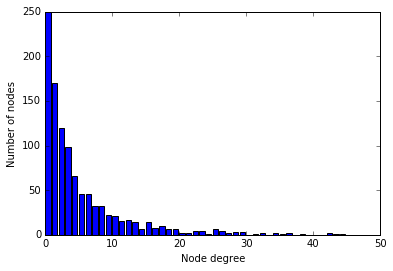

In [166]:
out_hist = create_histogram_from_graph(graph.out_degree().values())
create_bar_from_hist(out_hist)

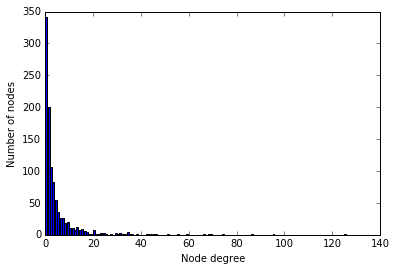

In [167]:
in_hist = create_histogram_from_graph(graph.in_degree().values())
create_bar_from_hist(in_hist)

The most common degree is 0

> * Plot the distribution of in-degrees and out-degrees one more time, this time plotted loglog scale.
> * Describe the distributions (as you would in a well written figure caption). Do they look Poissonian? Power-law? Something in between?


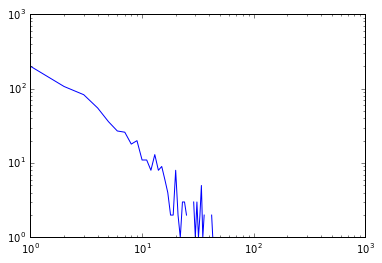

In [168]:
plt.loglog(in_hist)

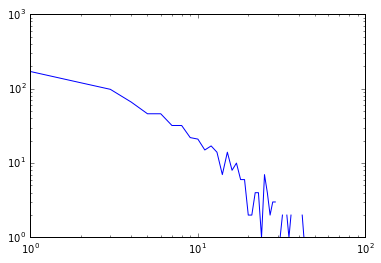

In [169]:
plt.loglog(out_hist)

They seem to follow the power-law distribution, There are alot of nodes with low degree, and a few nodes with very high degree.

> * Plot a scatter plot of the the in- versus out- degree for all philosophers using a loglog scale. Comment on the relation between the two.
>

(0.1, 1000.0)

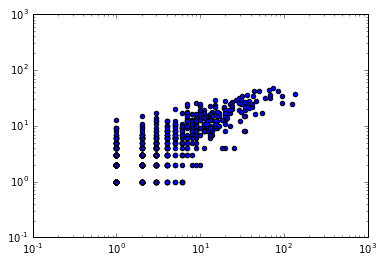

In [215]:
plt.figure()
plt.scatter(graph.in_degree().values(),graph.out_degree().values())
plt.xscale("log")
plt.yscale("log")
plt.xlim(1e-1,1e3)
plt.ylim(1e-1,1e3)

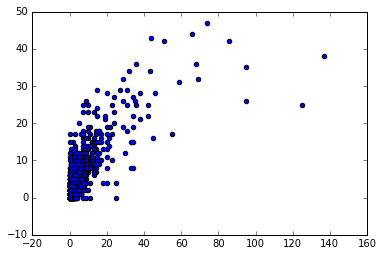

In [214]:
plt.scatter(graph.in_degree().values(),graph.out_degree().values())

In general it look like the majority has more outgoing links then ingoing. But there is a few that have a high number of ingoing compared to outgoing.  